# Capstone 2 Project: Regression Analysis for Predicting Compressive Strength of Concrete

In [31]:
import numpy as np 
import pandas as pd   
import seaborn as sns 
import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 


First step is to inspect the data 

In [32]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [33]:
df.info() # to check for null values and object type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [34]:
df.describe()  # 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## The dataset contains 1030 entries and 9 columns with no missing values. Here's a summary of each column:

* cement: The amount of cement (kg in a m^3 mixture)
* slag: The amount of blast furnace slag (kg in a m^3 mixture)
* ash: The amount of fly ash (kg in a m^3 mixture)
* water: The amount of water (kg in a m^3 mixture)
* superplastic: The amount of superplasticizer (kg in a m^3 mixture)
* coarseagg: The amount of coarse aggregate (kg in a m^3 mixture)
* fineagg: The amount of fine aggregate (kg in a m^3 mixture)
* age: Age of the concrete (days)
* strength: Concrete compressive strength (MPa, megapascals)
* Here are some key statistical insights from the dataset:

* The features are mainly composed of float64 types, except for 'age', which is an int64.
* The dataset ranges across different scales. For instance, 'cement' ranges from 102 to 540, while 'age' varies from 1 to 365 days.
* The target variable, 'strength', shows concrete compressive strength ranging from 2.33 to 82.6 MPa with a mean of approximately 35.82 MPa.

Next step: I will drop duplicate records because i dont want it skew my prediction output and accuracy. 

In [35]:
df = df.drop(df[df.duplicated()].index) # to drop duplicate rows 
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [36]:
df.duplicated().sum()

0

## DATA VISUALIZATIONS 
Heat Map to determine the correlation among the features

Text(0.5, 1.0, 'correlaton amoung features on concrete mixture')

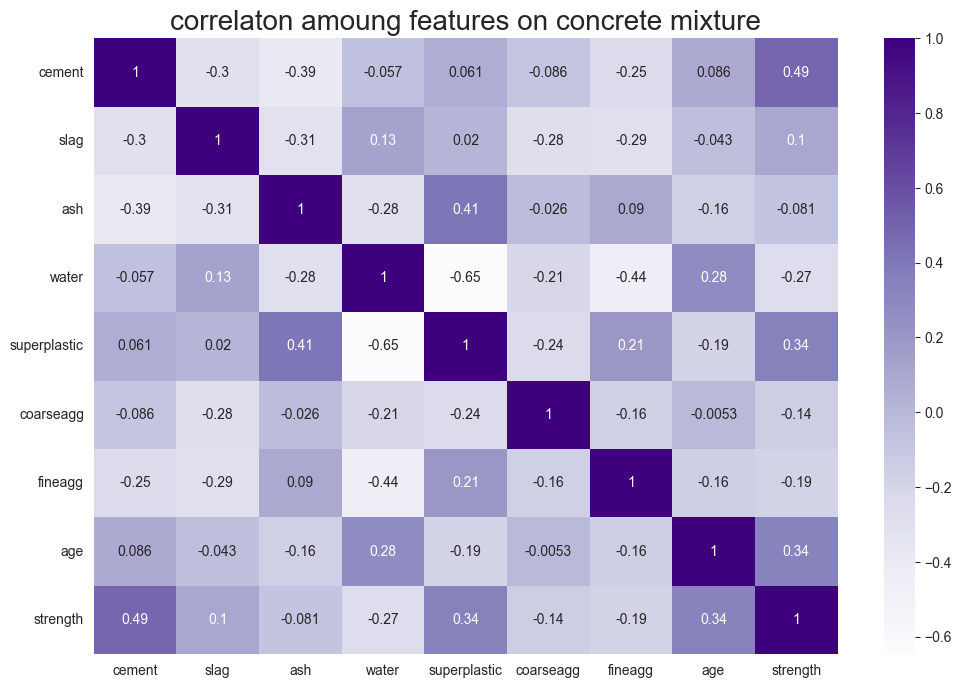

In [37]:

plt.figure(figsize=(12,8))

# We will creat a heatmap by calling .heatmap on sns(seaborn) library
sns.heatmap(df.corr(),annot=True,cmap='Purples') # correlation heatmap 

# We will set title by callig .title on the plot
plt.title('correlaton amoung features on concrete mixture',fontsize=20)

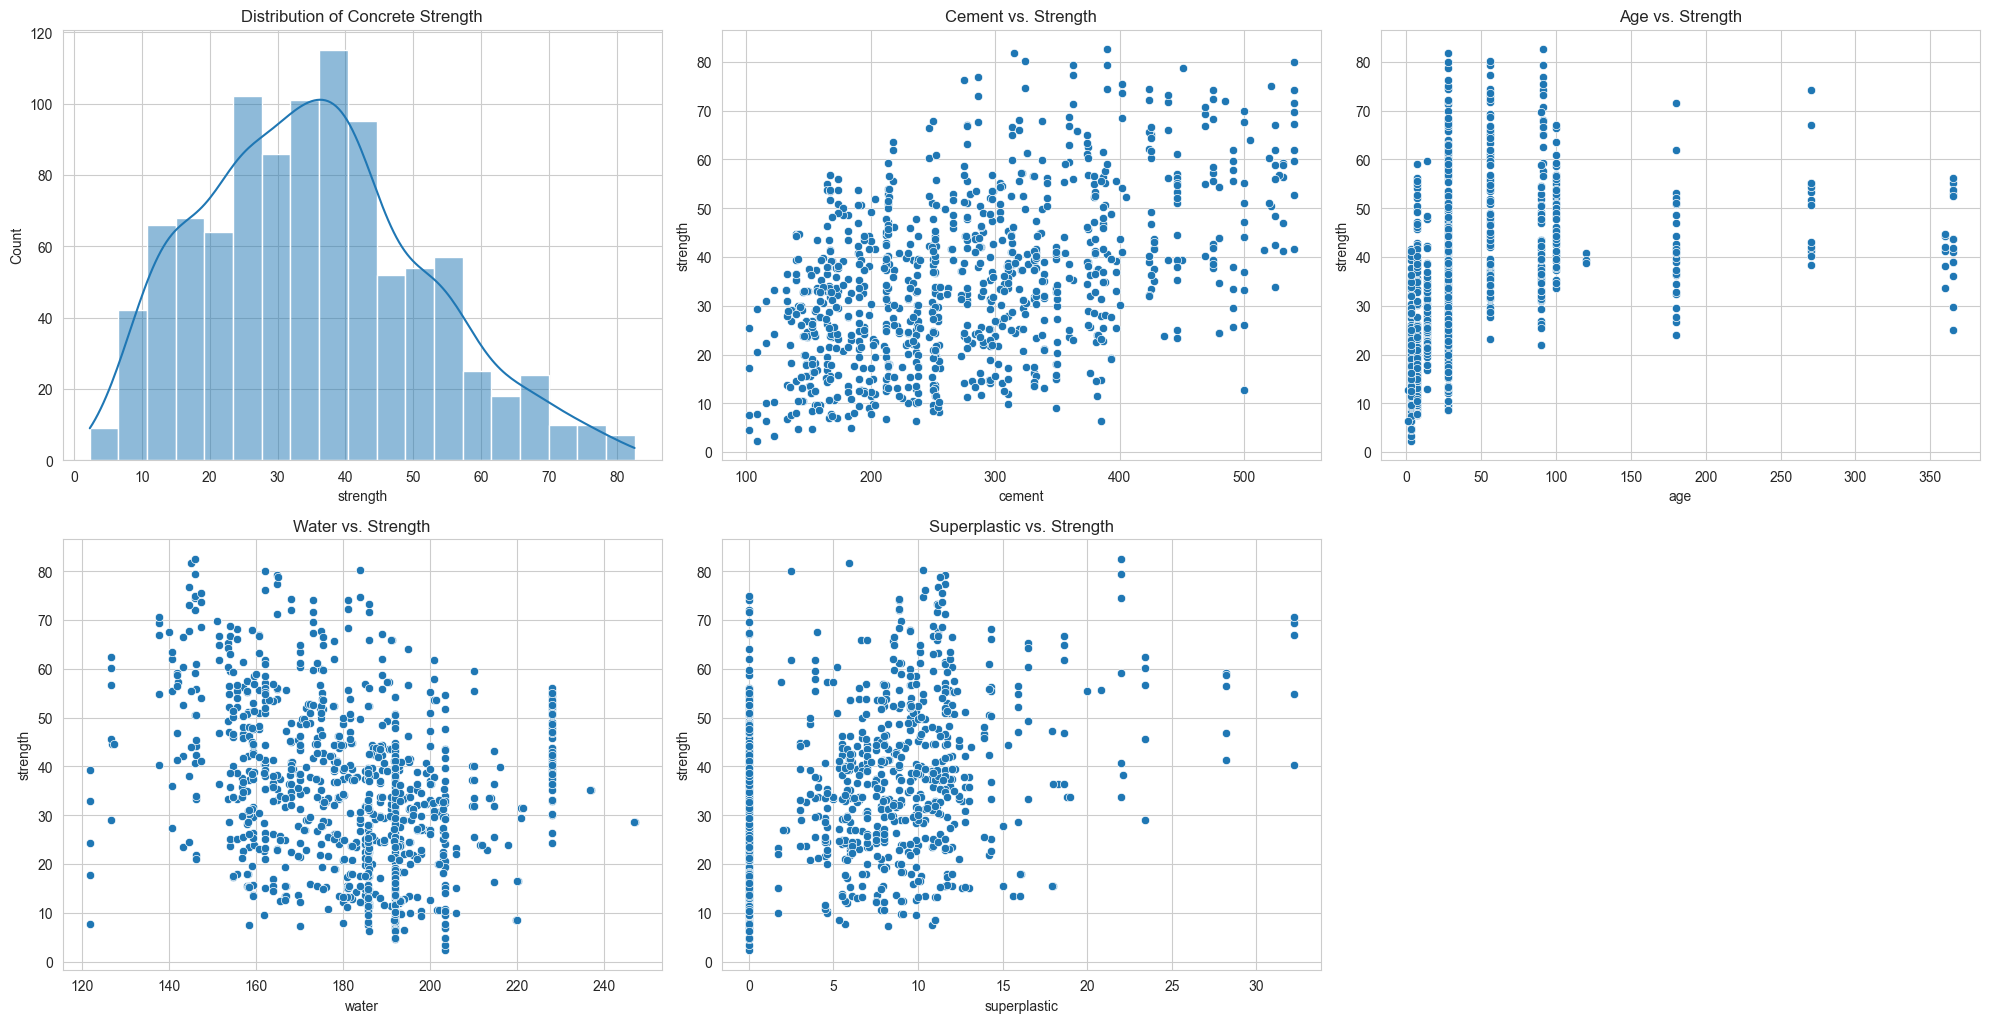

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure size
plt.figure(figsize=(20, 15))

# Subplot 1: Distribution of Concrete Strength
plt.subplot(3, 3, 1)
sns.histplot(df['strength'], kde=True)
plt.title('Distribution of Concrete Strength')

# Subplot 2: Cement vs. Strength
plt.subplot(3, 3, 2)
sns.scatterplot(data=df, x='cement', y='strength')
plt.title('Cement vs. Strength')

# Subplot 3: Age vs. Strength
plt.subplot(3, 3, 3)
sns.scatterplot(data=df, x='age', y='strength')
plt.title('Age vs. Strength')

# Subplot 4: Water vs. Strength
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='water', y='strength')
plt.title('Water vs. Strength')

# Subplot 5: Superplastic vs. Strength
plt.subplot(3, 3, 5)
sns.scatterplot(data=df, x='superplastic', y='strength')
plt.title('Superplastic vs. Strength')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## The visualizations provide several insights into the dataset:

* 1. Distribution of Concrete Strength: The strength of concrete shows a somewhat normal distribution with a slight right skew, indicating most samples have a strength around the mean value with some exceptions showing very high strength.
* 2. Cement vs. Strength: There seems to be a positive relationship between the amount of cement used in the mixture and the compressive strength of the concrete. Higher amounts of cement tend to result in stronger concrete.
* 3. Age vs. Strength: The relationship between age and strength shows that younger concrete (fewer days) varies widely in strength, but there's a trend where concrete tends to get stronger as it cures over time. However, after a certain point, the increase in strength becomes less significant.
* 4. Water vs. Strength: Higher amounts of water in the mixture tend to correlate with lower strength, which aligns with concrete science: too much water can weaken the concrete.
* 5. Superplastic vs. Strength: The use of superplasticizers shows a mixed relationship with strength. There's a wide variation in strength for lower amounts of superplasticizer, but higher amounts do not necessarily correlate with higher strength.


# Using Interquartile range to remove outliers 

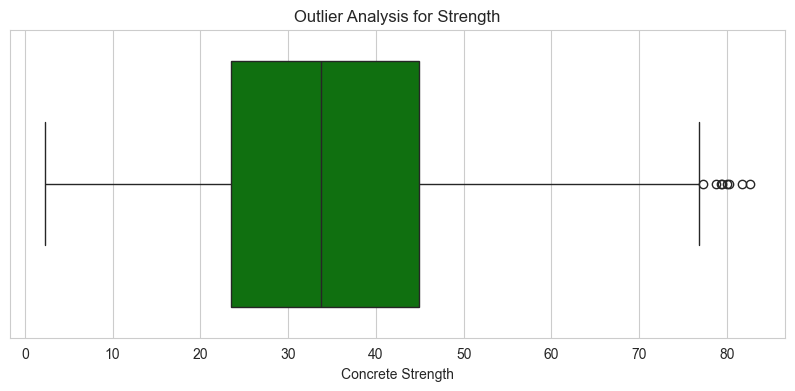

In [39]:
plt.figure (figsize=(10,4))
sns.boxplot(x=df['strength'], color='g')
plt.title('Outlier Analysis for Strength')
plt.xlabel('Concrete Strength')
plt.show()

In [40]:
# check for outliers 
Q3 = df['strength'].quantile(0.75)
Q1 = df['strength'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 *IQR
# Remove outliers 
df_clean = df[(df['strength'] >= lower_bound) & (df['strength'] <= upper_bound)]
df_clean.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# MODEL 1: Linear regression

In [41]:
#Step 1 determine the features and Target 
X = df_clean.drop('strength', axis=1) # independent variables
y = df_clean['strength'] # dependent variables 

In [42]:
# step 2 Data Split 
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=0)

print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 



(747, 8)
(250, 8)
(747,)
(250,)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression() # initialize linear regression model 
lr.fit(X_train_scaled,y_train)
linear_pred = lr.predict(X_test_scaled) # Predict concrete strength on test data

In [44]:
from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- Actual Target variable  
    y_pred:- model predicted Target values  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, linear_pred)

MSE:-  109.2051501244185
RMSE:-  10.450126799442124
R2_score:-  0.5660898733211558


Text(0, 0.5, 'Actual data concrete strength')

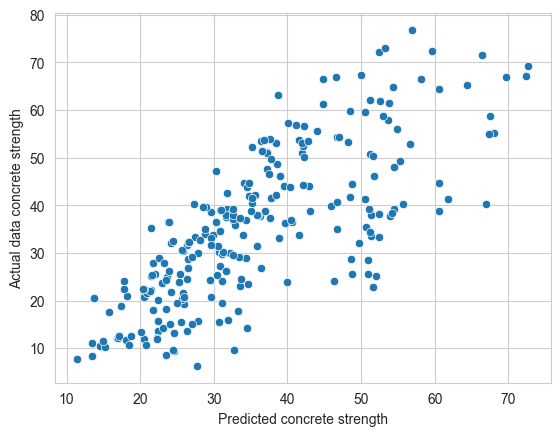

In [45]:
# Data visualization to compare predicted values against training data set 

sns.scatterplot(x=linear_pred, y=y_test)
plt.xlabel("Predicted concrete strength")
plt.ylabel("Actual data concrete strength")


The r2 score from using linear regression is quite low which can lead to underfitting.

# Model 2 using Lasso and Ridge 

In [46]:
from sklearn.linear_model import Lasso, Ridge 
la = Lasso().fit(X_train_scaled,y_train) # lasso model
ri = Ridge().fit(X_train_scaled,y_train) # ridge model


In [47]:
la_p = la.predict(X_test_scaled) 
ri_p = ri.predict(X_test_scaled)

In [48]:
# Lasso R^2, MSE metrics 
calculate_metrics(y_test, la_p) 

MSE:-  115.93525788988173
RMSE:-  10.76732361777437
R2_score:-  0.5393488092802443


In [49]:
# Rideg model  R^2, MSE metrics 
calculate_metrics(y_test, ri_p)

MSE:-  108.95553653201854
RMSE:-  10.438176877789461
R2_score:-  0.5670816751306458


## Model 3 using Random Forest AND Gradient Boosting 

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor(random_state=0) # Random Forest 
gb = GradientBoostingRegressor(random_state=0) # Gradient Boosting 

rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled) # predicted target value using RandomForest 
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled) # predicted target value using gradient boosting 

In [52]:
# Calculate metrics 
calculate_metrics(y_test, gb_pred)
calculate_metrics(y_test, rf_pred)

MSE:-  26.4934041410723
RMSE:-  5.147174384171601
R2_score:-  0.8947324706398071
MSE:-  26.829651556120183
RMSE:-  5.179734699395345
R2_score:-  0.8933964424553064


# Model 4: SVR model 

In [53]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 


In [54]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train_scaled,y_train)
svr_pred =svr.predict(X_test_scaled)

In [55]:
#svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.038 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.044 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.036 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.015 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.161 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.159 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.149 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.141 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.141 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.056 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
svr_pred = grid.predict(X_test_scaled)

In [57]:
calculate_metrics(y_test,svr_pred )

MSE:-  40.61826887754762
RMSE:-  6.373246337428643
R2_score:-  0.8386094595900278


Text(0, 0.5, 'Actual data concrete strength')

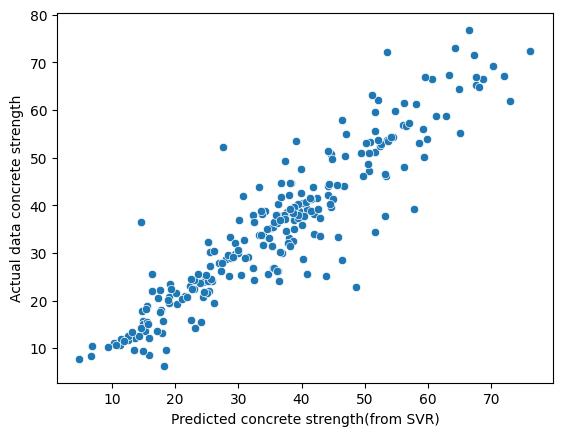

In [27]:
sns.scatterplot(x=svr_pred, y=y_test)
plt.xlabel("Predicted concrete strength(from SVR)")
plt.ylabel("Actual data concrete strength")


## RandomForest SVR Model

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'max_depth': 20, 'n_estimators': 200}, 0.8894364080041864)

#### Based on the R^2 score, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables, 
#### Both Gradient Boosting and Random Forest model show the most accurate for predicting the strength of concrete from the given dataset.
#### Using SVR RandomForestRegressor didn't improve our result any further 
